In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [12]:
benchmark_results = [
    pd.read_csv(path)
    for path in glob.glob('../benchmarks/2020-12-07-priority-frontier-mpi-procs/*.csv')
]
benchmark_results = pd.concat(benchmark_results)

benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
31,76,independent,8400,1.0,0.0,zipf,0,1,mpi_priority_frontier,1,855,0,564028,0
23,43,addremove,5200,0.8,0.0,zipf,0,1,mpi_priority_frontier,4,864,0,27009,0
133,87,remove,10000,0.6,0.0,zipf,0,1,mpi_priority_frontier,1,758,0,359525,0
102,31,addremove,3600,1.0,0.0,zipf,0,0,mpi_priority_frontier,1,361,0,64674,0
142,76,independent,8400,1.0,0.0,zipf,0,0,mpi_priority_frontier,2,1066,0,195187,0


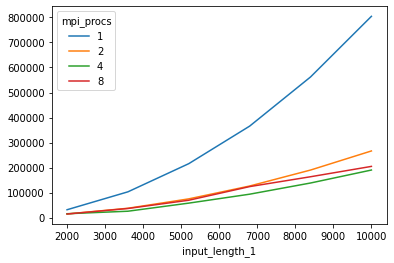

In [20]:
temp = benchmark_results.groupby(['generation_config_i', 'mpi_procs']).min()
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('mpi_procs')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot();

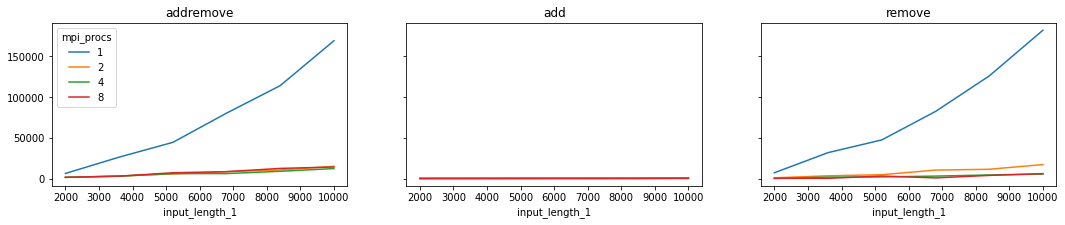

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = benchmark_results.groupby(['generation_config_i', 'mpi_procs']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('mpi_procs')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);

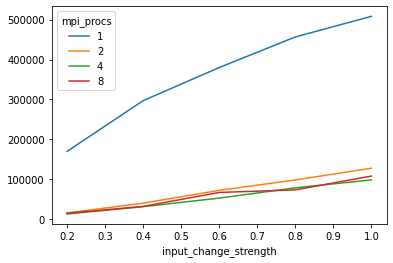

In [28]:
temp = benchmark_results.groupby(['generation_config_i', 'mpi_procs']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('mpi_procs')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot();